In [1]:
from sys import path
path.append('..')
path.append('../src/')

import numpy as np
import pickle as pkl
from keras.models import load_model
from os.path import join
from skmultilearn.model_selection import iterative_train_test_split
from icao_dataset import ICAODataset
from global_config import RANDOM_SEED
from utils import plot

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
PATH_TO_ROOT = '../'

FILE_DATASET = join(PATH_TO_ROOT, "data", "inkmarked_creased", "dataset.pkl")
FILE_MODEL = "../models/unsupervised_supervised/model_2022_01_24-15_28_35.h5"

print(FILE_DATASET)
print(FILE_MODEL)

../data\inkmarked_creased\dataset.pkl
../models/unsupervised_supervised/model_2022_01_24-15_28_35.h5


In [3]:
dataset = pkl.load(open(FILE_DATASET, "rb"))

In [4]:
model = load_model("../models/unsupervised_supervised/model_2022_01_24-15_28_35.h5")

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\arnal\Miniconda3\envs\dl-gpu\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
x = dataset.images
mrks = dataset.mrks
y = np.array([mrk_file.photo_reqs.values() for mrk_file in mrks])

print(x.shape, x.dtype)
print(y.shape, y.dtype)
print(len(mrks))

(5731, 160, 160, 3) float32
(5731, 23) int32
5731


In [6]:
TEST_SIZE = 0.1

np.random.seed(RANDOM_SEED)
x_train_idx, y_train, x_val_idx, y_val = iterative_train_test_split(np.arange(x.shape[0]).reshape(-1, 1), y, test_size=TEST_SIZE)
x_train_idx = x_train_idx.ravel()
x_val_idx = x_val_idx.ravel()

x_train = x[x_train_idx]
x_val = x[x_val_idx]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(5142, 160, 160, 3) (5142, 23)
(589, 160, 160, 3) (589, 23)


In [7]:
y_ink = np.array([mrk_file.photo_reqs.ink_marked_creased.value for mrk_file in mrks])

y_val = y_ink[x_val_idx]

In [8]:
y_pred = model.predict(x_val / 255)[:, 2]
y_pred = (y_pred > 0.5).astype(np.int)

In [9]:
accuracy_score(y_val, y_pred)

0.5059422750424448

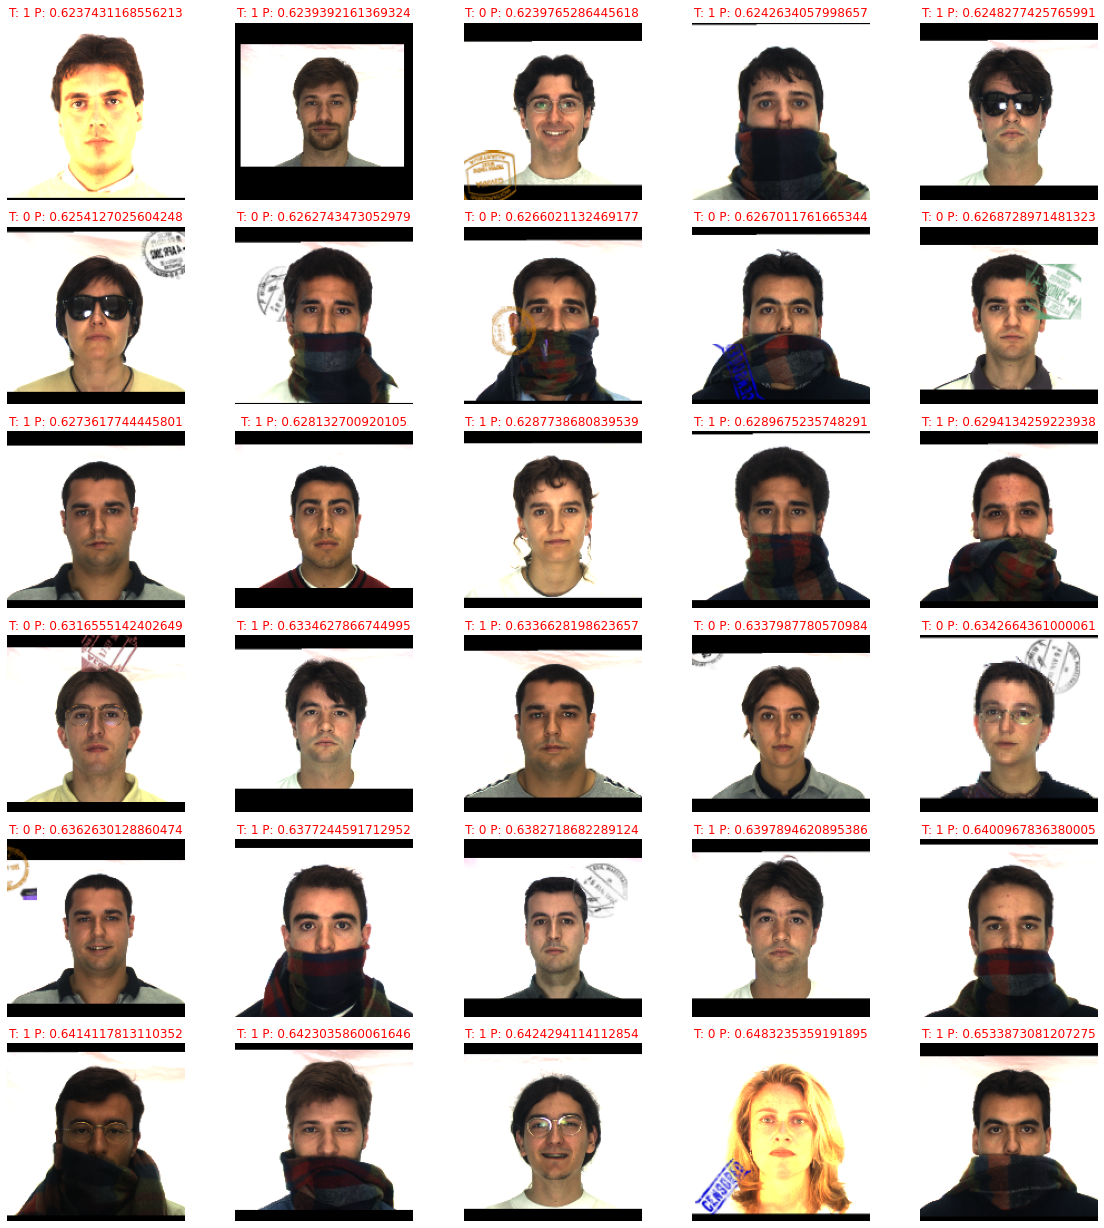

In [10]:
y_pred = model.predict(x_val / 255)[:, 2]
y_argsort = np.argsort(y_pred)[-30:]

x_worst = x_val[y_argsort][:, :, :, ::-1]
y_true_worst = y_val[y_argsort]
y_pred_worst = y_pred[y_argsort]

plot.image_batch(x_worst, y_true_worst, y_pred_worst, n_cols=5, figsize=(16, 20))